29 39 31
(100, 10, 7)
8 10 0.3347327062362262
10 12 0.33477453382271194
12 16 0.33527292602798275
16 20 0.3352189017807163
20 24 0.3357128353744308
24 32 0.33624720693671006
[0.3353265183631297] [0.0014302760977593758]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20
4 0.04564354645876384 20 24
5 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

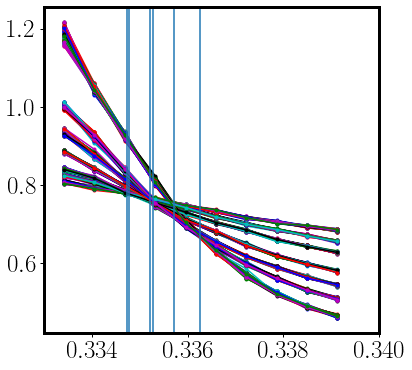

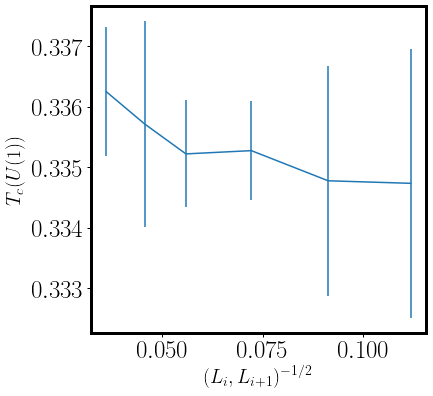

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit


plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

bare_Tc=[]
bare_Tc_err=[]
nu_list=[]
e=0
nu=0
h=1
rho=1
eta1=0
eta2=0.1
blow=0.315
bhigh=0.355
Hinit=1
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.333
bmax=0.34

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
end=np.where((beta<bmax))[0][-1]
start=np.where((beta>bmin))[0][0]
print(start, end, nbeta_cut)
nbeta_cut=end-start


U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        beta=beta[start:end]
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

28 50 10
(100, 22, 7)
8 10 0.3455458917294284
10 12 0.34550234620012704
12 16 0.3455873792148112
16 20 0.3461860508033553
20 24 0.3460444421280571
24 32 0.3475342620048859
[0.3353265183631297, 0.34606672868011085] [0.0014302760977593758, 0.0013656576466988153]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20
4 0.04564354645876384 20 24
5 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

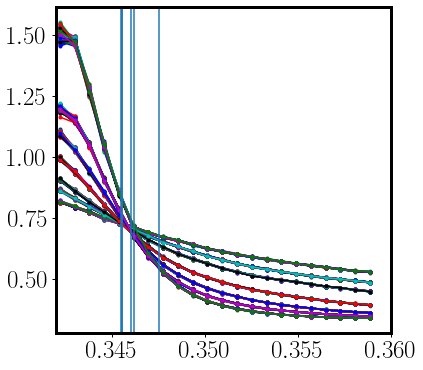

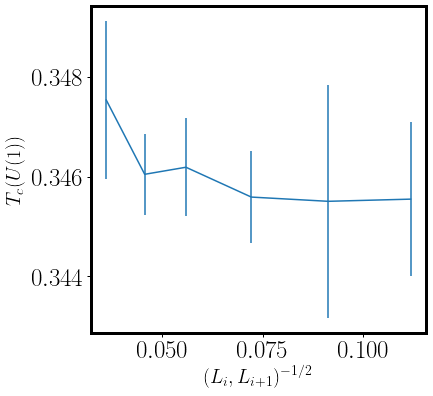

In [22]:
e=0
nu=0.2
h=1
rho=1
eta1=0
eta2=0.1
blow=0.32
bhigh=0.37
Hinit=1
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.342
bmax=0.36

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
end=np.where((beta<bmax))[0][-1]
start=np.where((beta>bmin))[0][0]
print(start, end, nbeta_cut)
nbeta_cut=end-start


U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        beta=beta[start:end]
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

32 44 22
(100, 12, 5)
8 10 0.3772807546523741
10 12 0.37762369868035267
12 16 0.3780574681886904
16 20 0.3790902661349056
[0.3353265183631297, 0.34606672868011085, 0.37801304691408066] [0.0014302760977593758, 0.0013656576466988153, 0.0005660916682893209]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20


<ErrorbarContainer object of 3 artists>

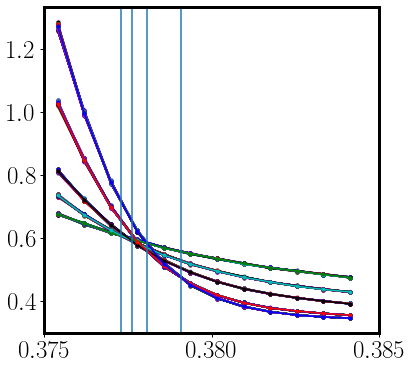

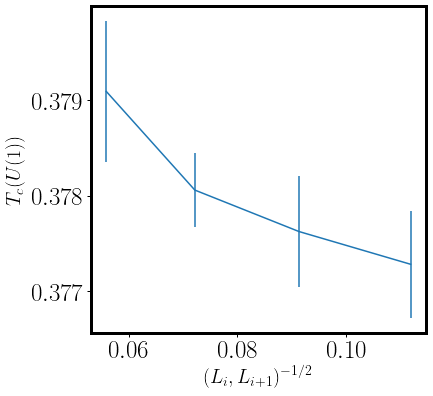

In [23]:
e=0
nu=0.4
h=1
rho=1
eta1=0
eta2=0.1
blow=0.35
bhigh=0.4
Hinit=1
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.375
bmax=0.385

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
end=np.where((beta<bmax))[0][-1]
start=np.where((beta>bmin))[0][0]
print(start, end, nbeta_cut)
nbeta_cut=end-start


U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        beta=beta[start:end]
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

19 44 12
(100, 25, 5)
8 10 0.4006214010487282
10 12 0.40151633700179545
12 16 0.4037409648625555
16 20 0.4069773589820511
[0.3353265183631297, 0.34606672868011085, 0.37801304691408066, 0.40321401547378255] [0.0014302760977593758, 0.0013656576466988153, 0.0005660916682893209, 0.0007289670578289286]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20


<ErrorbarContainer object of 3 artists>

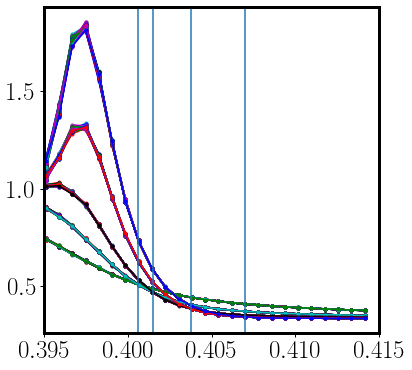

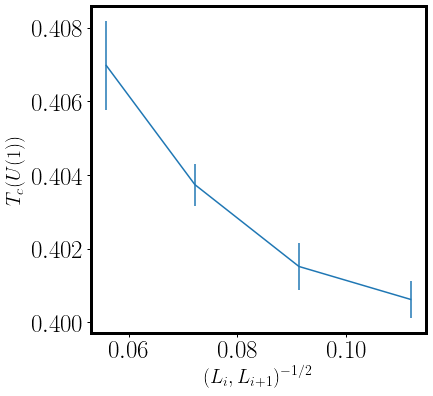

In [24]:
e=0
nu=0.5
h=1
rho=1
eta1=0
eta2=0.1
blow=0.38
bhigh=0.43
Hinit=1
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.395
bmax=0.415

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
end=np.where((beta<bmax))[0][-1]
start=np.where((beta>bmin))[0][0]
print(start, end, nbeta_cut)
nbeta_cut=end-start


U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        beta=beta[start:end]
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

11 52 25
(100, 41, 5)
8 10 0.4109262740957458
10 12 0.411211212044851
12 16 0.4115082491407778
16 20 0.41342063116115313
[0.3353265183631297, 0.34606672868011085, 0.37801304691408066, 0.40321401547378255, 0.4117665916106319] [0.0014302760977593758, 0.0013656576466988153, 0.0005660916682893209, 0.0007289670578289286, 0.0012871545878876856]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20


<ErrorbarContainer object of 3 artists>

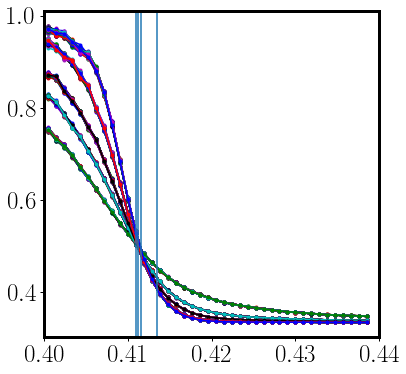

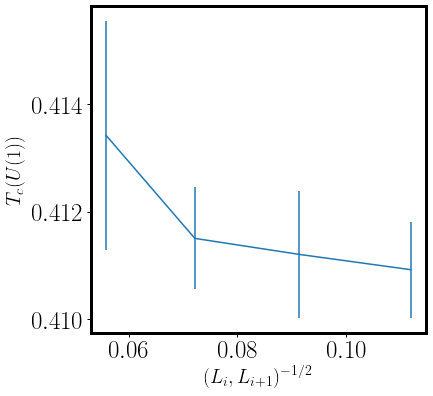

In [25]:
e=0
nu=0.55
h=1
rho=1
eta1=0
eta2=0.1
blow=0.39
bhigh=0.45
Hinit=1
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.4
bmax=0.44

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
end=np.where((beta<bmax))[0][-1]
start=np.where((beta>bmin))[0][0]
print(start, end, nbeta_cut)
nbeta_cut=end-start


U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        beta=beta[start:end]
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

10 44 41
(100, 34, 5)
8 10 0.4067832765261947
10 12 0.4067631814834594
12 16 0.40729126247296493
16 20 0.40785625499488726
[0.3353265183631297, 0.34606672868011085, 0.37801304691408066, 0.40321401547378255, 0.4117665916106319, 0.40717349386937657] [0.0014302760977593758, 0.0013656576466988153, 0.0005660916682893209, 0.0007289670578289286, 0.0012871545878876856, 0.0015073277610653647]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20


<ErrorbarContainer object of 3 artists>

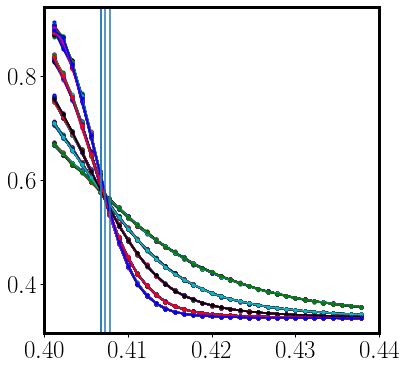

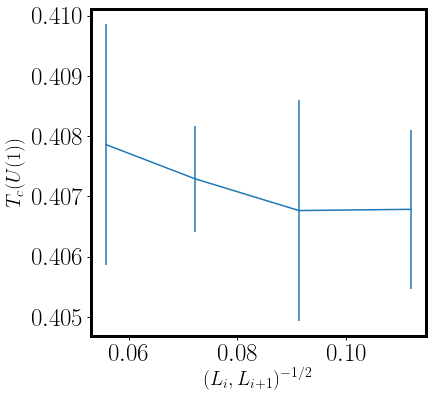

In [26]:
e=0
nu=0.6
h=1
rho=1
eta1=0
eta2=0.1
blow=0.39
bhigh=0.46
Hinit=1
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.4
bmax=0.44

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
end=np.where((beta<bmax))[0][-1]
start=np.where((beta>bmin))[0][0]
print(start, end, nbeta_cut)
nbeta_cut=end-start


U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        beta=beta[start:end]
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

16 47 34
(100, 31, 5)
8 10 0.3975306112783153
10 12 0.39825849232243377
12 16 0.398203944944312
16 20 0.3985848574314783
[0.3353265183631297, 0.34606672868011085, 0.37801304691408066, 0.40321401547378255, 0.4117665916106319, 0.40717349386937657, 0.39814447649413487] [0.0014302760977593758, 0.0013656576466988153, 0.0005660916682893209, 0.0007289670578289286, 0.0012871545878876856, 0.0015073277610653647, 0.0015150076089816855]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20


<ErrorbarContainer object of 3 artists>

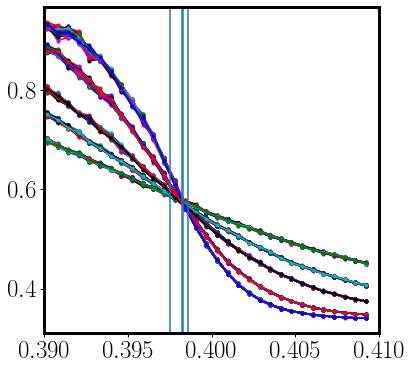

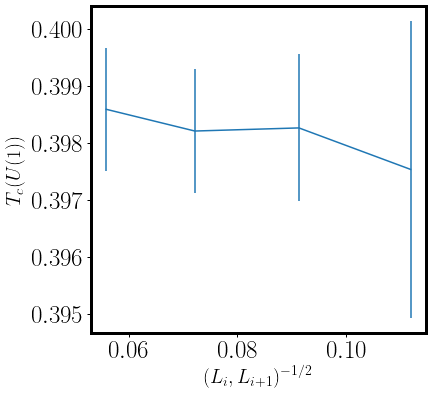

In [27]:
e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=0.1
blow=0.38
bhigh=0.42
Hinit=1
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.39
bmax=0.41

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
end=np.where((beta<bmax))[0][-1]
start=np.where((beta>bmin))[0][0]
print(start, end, nbeta_cut)
nbeta_cut=end-start


U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        beta=beta[start:end]
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

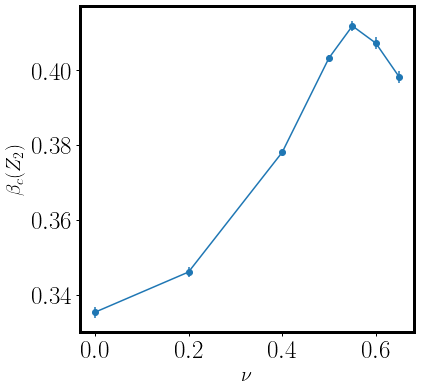

In [28]:
fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xlabel(r"$\nu$")
ax2.set_ylabel(r"$\beta_c(Z_2)$")
ax2.errorbar(nu_list,bare_Tc, yerr= bare_Tc_err, fmt="o-")

np.savetxt("%s/betac_Binder_Z2_eta2%s.txt" %(folder_fig, eta2), (nu_list,bare_Tc, bare_Tc_err))